## Usecase/Requirement:
Create different customer groups on basis of Age,Income,Spending

## Data Gathering

In [1]:
# To ignore non-harmful warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv(r'https://raw.githubusercontent.com/sindhura-nk/Datasets/refs/heads/main/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## EDA: TO understand the data better
EDA=> correlations, patterns in data

### There are no missing values nor any duplicated data

## Determine X => which contains features to be grouped
X => Age, Income and Spending

In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
X = df.drop(columns=['CustomerID','Gender'])
X.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [8]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [9]:
# changing column name
X.columns = ['Age','Income','Spending']

In [10]:
X.columns

Index(['Age', 'Income', 'Spending'], dtype='object')

In [11]:
# to add a new column
#X['new_col_name']= list/array of data

## Data Preprocessing and Data Cleaning

In [12]:
import os
os.chdir(r'C:\MachineLearning1418\repository\Algorithm Evaluation')

In [13]:
from data_clean_preprocess import clean_process_CON_data

In [14]:
con_pipe,X_pre = clean_process_CON_data(X)

In [15]:
con_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [16]:
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [17]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


## restart the kernel once installation done

## Model Building using Elbow method

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import kelbow_visualizer

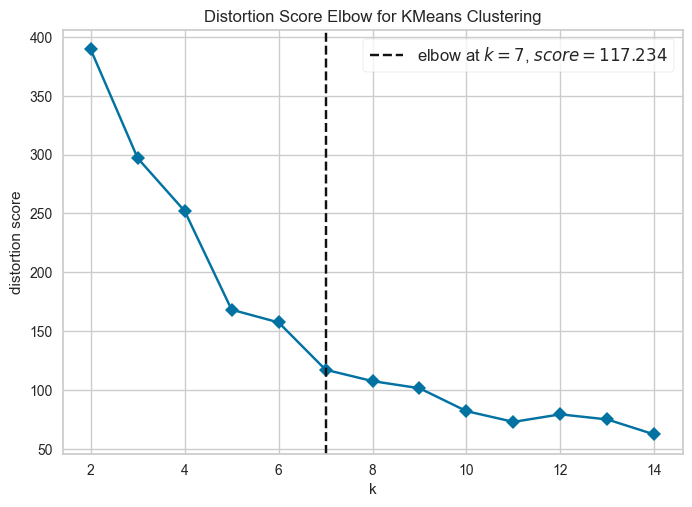

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
base_model = KMeans()
visualizer = kelbow_visualizer(base_model,X_pre,k=(2,15),timings=False)
visualizer.show()

## From above figure, k=7 is the best cluster possibility. 
# Final Model Buidling

In [21]:
best_kmeans = KMeans(n_clusters=7)
clusters = best_kmeans.fit_predict(X_pre)
clusters

array([1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 2, 1,
       4, 5, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 3, 1, 3, 2, 3, 6, 3, 6, 3,
       1, 3, 6, 3, 6, 3, 6, 3, 6, 3, 1, 3, 6, 3, 2, 3, 6, 3, 6, 3, 6, 3,
       6, 3, 6, 3, 6, 3, 2, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3], dtype=int32)

In [22]:
# centroids of all the clusters
best_kmeans.cluster_centers_

array([[ 1.86593393, -0.28283547, -0.01358755],
       [-1.02441513, -0.22957177, -0.03952741],
       [ 0.61233873, -0.14037369, -0.12080356],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.47007182, -1.33249477, -1.2287024 ],
       [-0.97439592, -1.32954532,  1.13217788],
       [ 0.15429838,  1.1010449 , -1.34346864]])

In [23]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [24]:
clusters

array([1, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 2, 1,
       4, 5, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 3, 1, 3, 2, 3, 6, 3, 6, 3,
       1, 3, 6, 3, 6, 3, 6, 3, 6, 3, 1, 3, 6, 3, 2, 3, 6, 3, 6, 3, 6, 3,
       6, 3, 6, 3, 6, 3, 2, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3], dtype=int32)

In [25]:
X['Groups'] = clusters

In [26]:
X.head()

,Age,Income,Spending,Groups
0,19,15,39,1
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4


In [27]:
X['Groups']==0

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Groups, Length: 200, dtype: bool

In [28]:
X[X['Groups']==0]

,Age,Income,Spending,Groups
40,65,38,35,0
53,59,43,60,0
57,69,44,46,0
60,70,46,56,0
62,67,47,52,0
64,63,48,51,0
67,68,48,48,0
70,70,49,55,0
72,60,50,49,0
73,60,50,56,0


In [29]:
len(X[X['Groups']==0])

20

In [30]:
for i in range(6):
    print(f'Cluster {i}')
    display(X[X['Groups']==i])
    print("=================")

Cluster 0


,Age,Income,Spending,Groups
40,65,38,35,0
53,59,43,60,0
57,69,44,46,0
60,70,46,56,0
62,67,47,52,0
64,63,48,51,0
67,68,48,48,0
70,70,49,55,0
72,60,50,49,0
73,60,50,56,0


Cluster 1


,Age,Income,Spending,Groups
0,19,15,39,1
43,31,39,61,1
47,27,40,47,1
48,29,40,42,1
49,31,40,42,1
51,33,42,60,1
52,31,43,54,1
58,27,46,51,1
61,19,46,55,1
65,18,48,59,1


Cluster 2


,Age,Income,Spending,Groups
42,48,39,36,2
46,50,40,55,2
50,49,42,52,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2
59,53,46,46,2
63,54,47,59,2
66,43,48,50,2
71,47,49,42,2


Cluster 3


,Age,Income,Spending,Groups
123,39,69,91,3
125,31,70,77,3
127,40,71,95,3
129,38,71,75,3
131,39,71,75,3
133,31,72,71,3
135,29,73,88,3
137,32,73,73,3
139,35,74,72,3
141,32,75,93,3


Cluster 4


,Age,Income,Spending,Groups
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4
10,67,19,14,4
12,58,20,15,4
14,37,20,13,4
16,35,21,35,4
18,52,23,29,4
20,35,24,35,4


Cluster 5


,Age,Income,Spending,Groups
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5
11,35,19,99,5
13,24,20,77,5
15,22,20,79,5
17,20,21,66,5
19,35,23,98,5


In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [32]:
X1 = df.drop(columns='CustomerID')
X1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Clusters - Visualization

In [49]:
X.columns

Index(['Age', 'Income', 'Spending', 'Groups'], dtype='object')

In [50]:
import plotly.express as ex
fig = ex.scatter_3d(data_frame=X,x='Age',y='Income',z='Spending',color='Groups')
fig.show()

Considering Gender also into X1

In [33]:
X1.columns = ['Gender','Age','Income','Spending']
X1.head()

,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [35]:
cat = list(X1.columns[X1.dtypes=='object'])
con = list(X1.columns[X1.dtypes!='object'])

In [36]:
from data_clean_preprocess import clean_process_data
num_pipe2, X1_pre = clean_process_data(cat,con,X1)
X1_pre.head()

,cat__Gender_Female,cat__Gender_Male,con__Age,con__Income,con__Spending
0,0.0,1.0,-1.424569,-1.738999,-0.434801
1,0.0,1.0,-1.281035,-1.738999,1.195704
2,1.0,0.0,-1.352802,-1.700830,-1.715913
3,1.0,0.0,-1.137502,-1.700830,1.040418
4,1.0,0.0,-0.563369,-1.662660,-0.395980


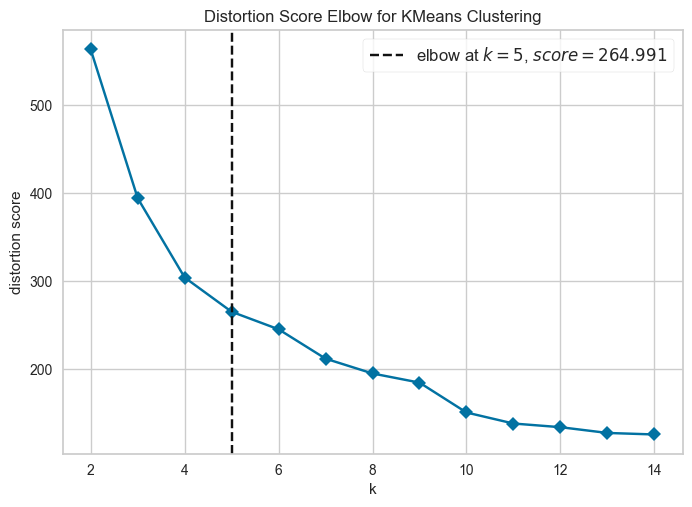

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
visualizer2 = kelbow_visualizer(base_model,X1_pre,k=(2,15),timings=False)
visualizer2.show()

## Inertia

In [48]:
best_kmeans.inertia_

117.13060763524547

In [47]:
best_kmeans2.inertia_

266.2502061783069

## From above figure, k=5 clusters provides best grouping of data. 
# Final model building

In [39]:
best_kmeans2 = KMeans(5)
clusters2 = best_kmeans2.fit_predict(X1_pre)
clusters2

array([0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [40]:
X1['Groups'] = clusters2
X1.head()

,Gender,Age,Income,Spending,Groups
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,4
3,Female,23,16,77,0
4,Female,31,17,40,0


In [41]:
for i in range(5):
    print(f'Cluster {i}')
    display(X1[X1['Groups']==i])
    print('================')

Cluster 0


,Gender,Age,Income,Spending,Groups
0,Male,19,15,39,0
1,Male,21,15,81,0
3,Female,23,16,77,0
4,Female,31,17,40,0
5,Female,22,17,76,0
7,Female,23,18,94,0
9,Female,30,19,72,0
11,Female,35,19,99,0
13,Female,24,20,77,0
15,Male,22,20,79,0


Cluster 1


,Gender,Age,Income,Spending,Groups
122,Female,40,69,58,1
123,Male,39,69,91,1
125,Female,31,70,77,1
127,Male,40,71,95,1
129,Male,38,71,75,1
131,Male,39,71,75,1
133,Female,31,72,71,1
135,Female,29,73,88,1
137,Male,32,73,73,1
139,Female,35,74,72,1


Cluster 2


,Gender,Age,Income,Spending,Groups
40,Female,65,38,35,2
42,Male,48,39,36,2
46,Female,50,40,55,2
50,Female,49,42,52,2
53,Male,59,43,60,2
54,Female,50,43,45,2
55,Male,47,43,41,2
56,Female,51,44,50,2
57,Male,69,44,46,2
59,Male,53,46,46,2


Cluster 3


,Gender,Age,Income,Spending,Groups
121,Female,38,67,40,3
124,Female,23,70,29,3
126,Male,43,71,35,3
128,Male,59,71,11,3
130,Male,47,71,9,3
132,Female,25,72,34,3
134,Male,20,73,5,3
136,Female,44,73,7,3
138,Male,19,74,10,3
140,Female,57,75,5,3


Cluster 4


,Gender,Age,Income,Spending,Groups
2,Female,20,16,6,4
6,Female,35,18,6,4
8,Male,64,19,3,4
10,Male,67,19,14,4
12,Female,58,20,15,4
14,Male,37,20,13,4
16,Female,35,21,35,4
18,Male,52,23,29,4
20,Male,35,24,35,4
22,Female,46,25,5,4


In [44]:
os.chdir(r'C:\MachineLearning1418\repository\CLustering')

In [45]:
X.to_csv('Age_Income_Spending-Clusters.csv',index=False)

In [46]:
X1.to_csv('GenderAgeIncomeSpending-Clusters.csv',index=False)